### Import libraries and load datasets

In [1]:
#import neccesary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from itertools import cycle, islice
sns.set(style="white", context="talk")
import warnings
warnings.filterwarnings('ignore')
from preprocessing import datetime, read_dataset, find_season, create_weekday, scale_outliers, drop



In [2]:
#load in the dataset
df=pd.read_csv('/data/costs.csv')
df.head()

,Unnamed: 0,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought
0,0,2019-08-01,order,fitness,east,167.1768,7
1,1,2019-08-01,order,jog/run,south,297.5084,8
2,2,2019-08-01,order,pilates,south,150.5168,5
3,3,2019-08-01,order,pilates,east,91.9114,7
4,4,2019-08-01,physical_collection,diving,west,90.8194,2


In [3]:
#remove the unneccesary column
df=df.drop(columns=['Unnamed: 0'])
df.head()

,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought
0,2019-08-01,order,fitness,east,167.1768,7
1,2019-08-01,order,jog/run,south,297.5084,8
2,2019-08-01,order,pilates,south,150.5168,5
3,2019-08-01,order,pilates,east,91.9114,7
4,2019-08-01,physical_collection,diving,west,90.8194,2


### Data visualizations, analysis and Feature Engineering

In [4]:
#convert date to datetime and extract month and day from it
df['Date']=pd.to_datetime(df['Date'])
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

In [5]:
df.head()

,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought,month,day
0,2019-08-01,order,fitness,east,167.1768,7,8,1
1,2019-08-01,order,jog/run,south,297.5084,8,8,1
2,2019-08-01,order,pilates,south,150.5168,5,8,1
3,2019-08-01,order,pilates,east,91.9114,7,8,1
4,2019-08-01,physical_collection,diving,west,90.8194,2,8,1


In [6]:
df=df[df['sporting_equipment']!='unknown']

In [7]:
#check for missing values
df.isnull().sum()

Date                      0
mode_of_purchase          0
sporting_equipment        0
store                     0
estimated_spending        0
number_of_items_bought    0
month                     0
day                       0
dtype: int64

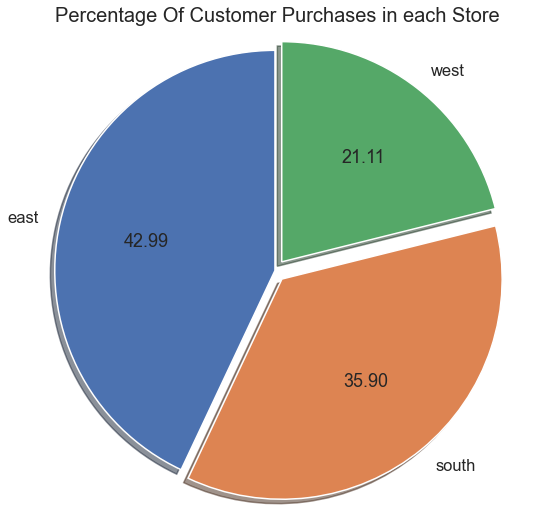

In [8]:
fig1, ax1 = plt.subplots(figsize=(9,9))
explode=(0,0.05, 0.05)
plt.pie(df['store'].value_counts(),labels=df['store'].unique(), explode=explode,shadow=True,
        startangle=90,autopct='%.2f')
ax1.axis('equal');
ax1.set_title('Percentage Of Customer Purchases in each Store',fontdict={'size':20});

#### The east store had the most purchases from customers, with almost half of the total number, coming from that store
#### West store accounted for only around 21% of the total number of purchases

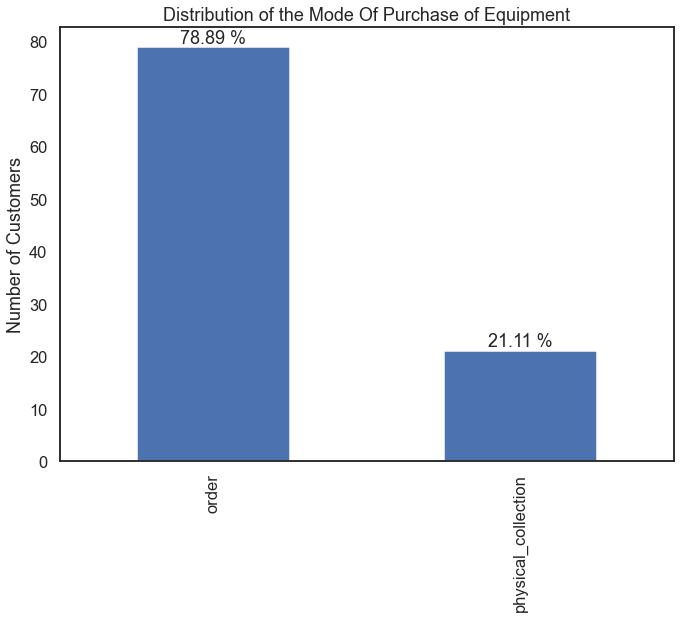

In [9]:
plt.figure(figsize=(11,8))
ax = (df['mode_of_purchase'].value_counts()/len(df['mode_of_purchase'])*100).plot.bar(rot=90)
ax.bar_label(ax.containers[0], fmt='%.2f %%')
ax.margins(x=12)
plt.ylabel('Number of Customers')
plt.title('Distribution of the Mode Of Purchase of Equipment')
plt.show()

#### Most customers prefer to order these sporting equipments than to go to the actual stores to purchase them, with almost 80% of them ordering the equipment, this could be due to the effect of corona, which made everyone stay home, since the data spans before corona, during lockdown and after lockdown

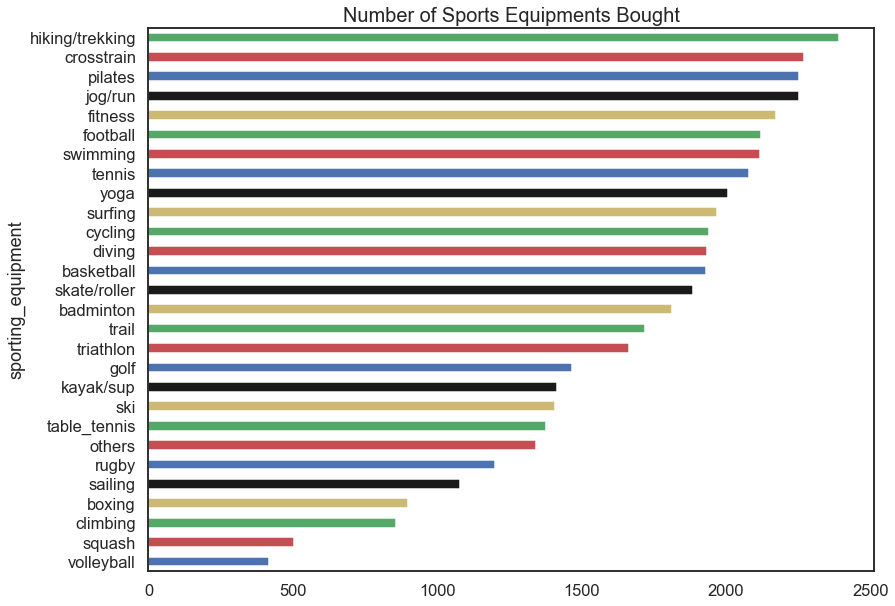

In [10]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
ax=df.groupby('sporting_equipment')['number_of_items_bought'].count().sort_values().plot(kind='barh',figsize=(13,10), color=my_colors)
ax.set_title('Number of Sports Equipments Bought',fontdict={'size':20});

#### The equipment for hiking or trekking were the most purchased, and volley ball equipment were the least purchased
#### The most popular sport in the world, which is football, was the 6th most purchased, with around 2100 of them being bought
#### Basketball, which is the most popular in the US, didnt make the top 10 of most purchased sporting equipment by these customers

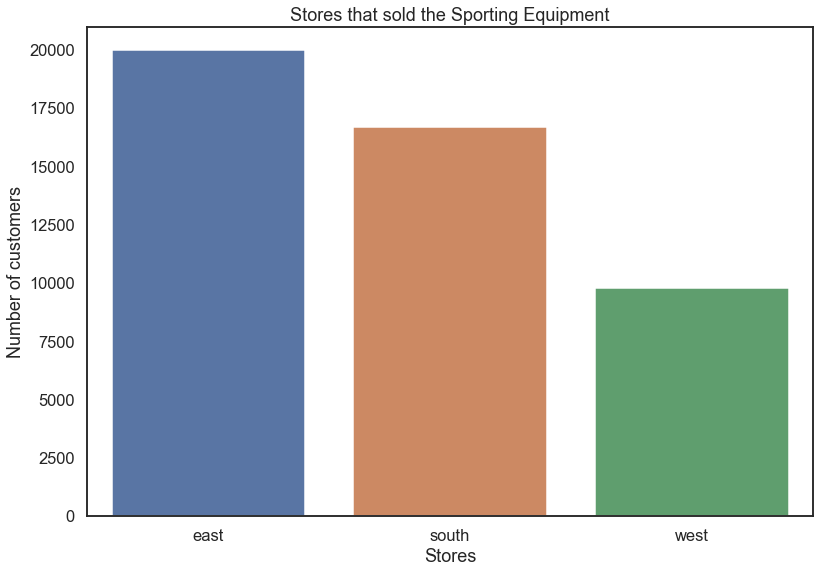

In [11]:
plt.figure(figsize=(13,9))
sns.countplot(x='store', data=df)
plt.xlabel('Stores')
plt.ylabel('Number of customers')
plt.title('Stores that sold the Sporting Equipment');

#### 3 stores sold equipment to customers, with the store on the eastern side selling the most, with around 20000 equipments
#### The west store sold the least, with only under 10000 equipment being sold by this store

In [12]:
df['month']

0         8
1         8
2         8
3         8
4         8
         ..
46758    10
46759    10
46760    10
46761    10
46762    10
Name: month, Length: 46478, dtype: int64

In [13]:
def find_season(month):
    season = {12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
    return season.get(month)

In [14]:
season_list = []
for month in df['month']:
    season = find_season(month)
    season_list.append(season)
    
df['seasons'] = season_list

In [15]:
df['seasons'].value_counts()

Autumn    13726
Summer    12093
Spring    10365
Winter    10294
Name: seasons, dtype: int64

In [16]:
#Creating seasons from the months
#df['seasons']=(pd.cut(df['month'], [3,5,8,11,14], labels=['spring','summer','autumn','Winter'], right=False,include_lowest=True))
#df['seasons'].value_counts()

<AxesSubplot:xlabel='seasons'>

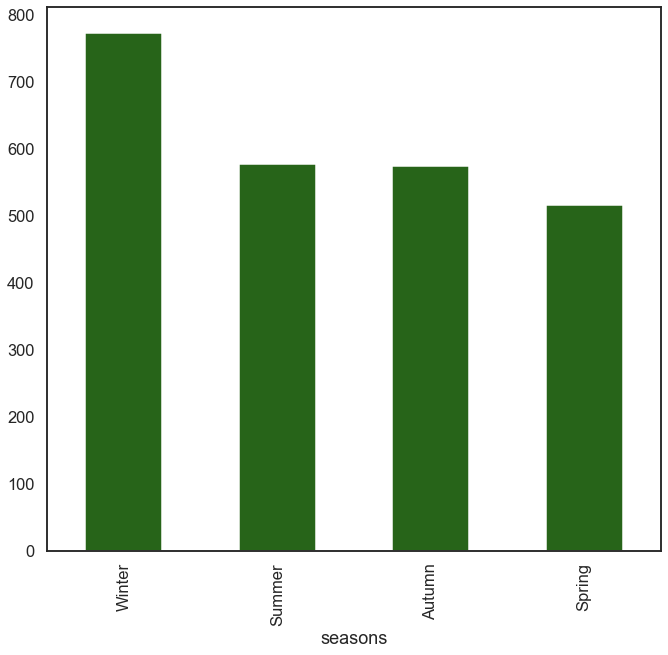

In [17]:
df.groupby('seasons')['estimated_spending'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(11,10),cmap='PiYG_r')

#### Even though winter was the season with the least purchases, most customers spent on average higher during that season than the other seasons, with a little under 800 dollars being spent, which could be due to the fact that usually, prices of goods generally increase during this period
#### Autumn had the most purchases, but on average customers spent under 600 dollars in that season

<AxesSubplot:xlabel='store', ylabel='count'>

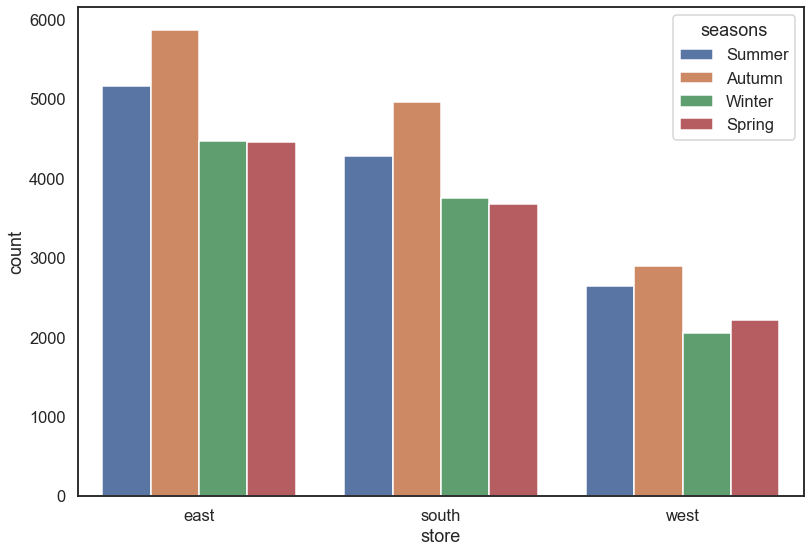

In [18]:
plt.figure(figsize=(13,9))
sns.countplot(x='store', data=df, hue='seasons')

In [19]:
df.head(3)

,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought,month,day,seasons
0,2019-08-01,order,fitness,east,167.1768,7,8,1,Summer
1,2019-08-01,order,jog/run,south,297.5084,8,8,1,Summer
2,2019-08-01,order,pilates,south,150.5168,5,8,1,Summer


<AxesSubplot:xlabel='store'>

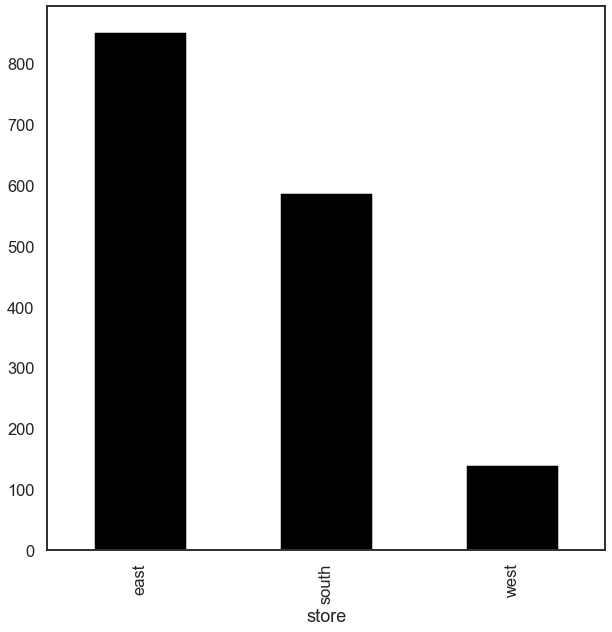

In [20]:
df.groupby('store')['estimated_spending'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(10,10),cmap='nipy_spectral')

#### As the east store made the most purchases, customers also spent the most in that store on average, with about 850 dollars being spent there

In [21]:
#extracting weekday from day of week
df['weekday']=np.where((df['Date'].dt.dayofweek) < 5,'weekday','weekend')

In [22]:
df['weekday'].value_counts()

weekday    33307
weekend    13171
Name: weekday, dtype: int64

<AxesSubplot:xlabel='weekday'>

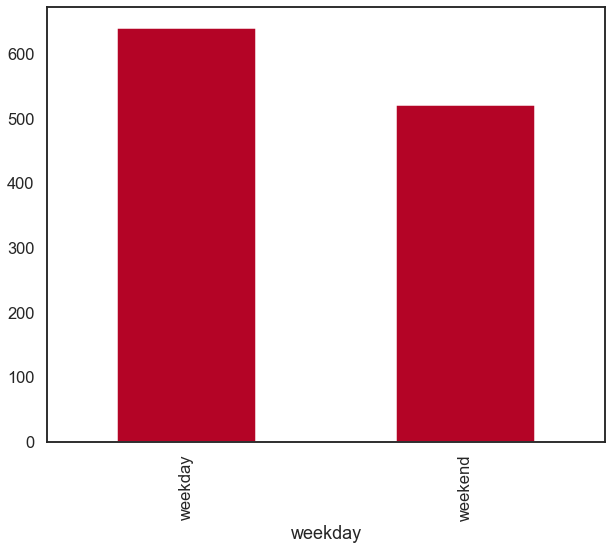

In [23]:
df.groupby('weekday')['estimated_spending'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(10,8),cmap='coolwarm_r')

#### Most customers spent more on weekdays than the weekdays, with around 650 dollars being spent on average on the weekdays, compared to a little over 500 dollars being spent on the weekend, this could be due to the fact that, most people do sporting activties during the weekend, so they prefer buying these equipment ahead of time(during the week), so they dont now have to be running around, looking for the equipment when they really need it on the weekend

In [24]:
df.groupby('weekday')['number_of_items_bought'].mean().sort_values(ascending=False)

weekday
weekday    7.933648
weekend    6.870625
Name: number_of_items_bought, dtype: float64

<AxesSubplot:xlabel='weekday'>

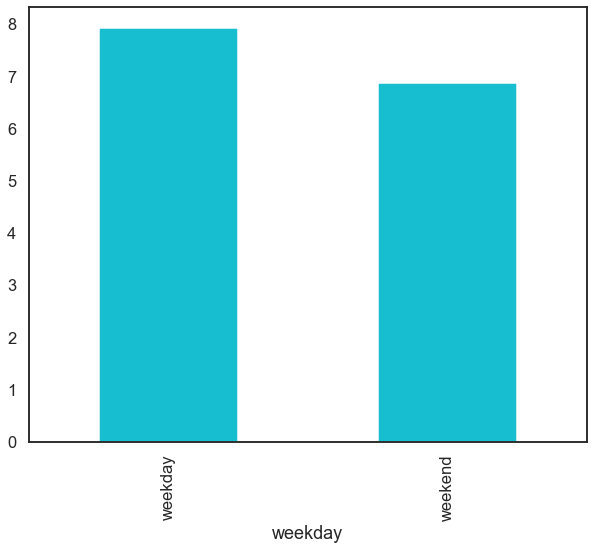

In [25]:
df.groupby('weekday')['number_of_items_bought'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(10,8),cmap='tab10_r')

#### Also, more equipments were sold on average during the week than the weekends, with more equipment being sold 6.9% during the weekday more than in the weekend

In [26]:
#extracting the data before and after corona
df['Corona_effect']=np.where((df['Date']) > '2020-03-10','corona_effect','before_corona')

In [27]:
df.head()

,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought,month,day,seasons,weekday,Corona_effect
0,2019-08-01,order,fitness,east,167.1768,7,8,1,Summer,weekday,before_corona
1,2019-08-01,order,jog/run,south,297.5084,8,8,1,Summer,weekday,before_corona
2,2019-08-01,order,pilates,south,150.5168,5,8,1,Summer,weekday,before_corona
3,2019-08-01,order,pilates,east,91.9114,7,8,1,Summer,weekday,before_corona
4,2019-08-01,physical_collection,diving,west,90.8194,2,8,1,Summer,weekday,before_corona


<AxesSubplot:xlabel='Corona_effect'>

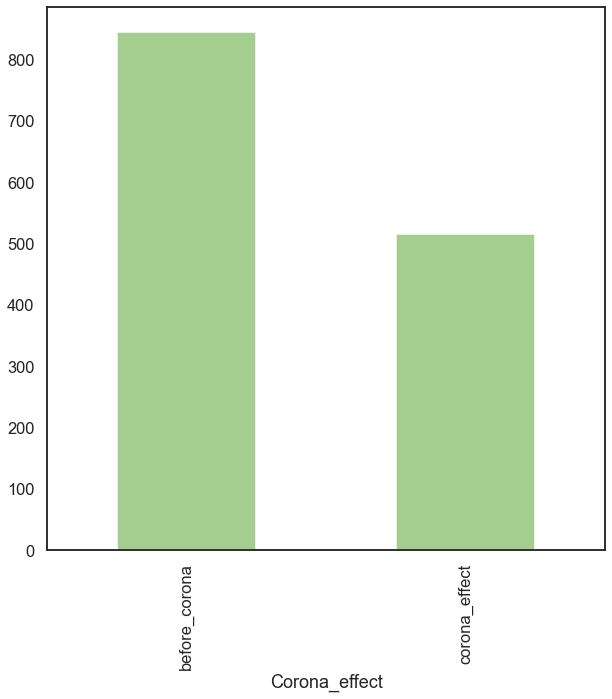

In [28]:
df.groupby('Corona_effect')['estimated_spending'].mean().plot(kind='bar',figsize=(10,10),cmap='crest')

#### As expected, there was more spending before corona occurred, than when it occurred, with customers spending more than twice the amount before corona and after corona

<AxesSubplot:xlabel='Corona_effect'>

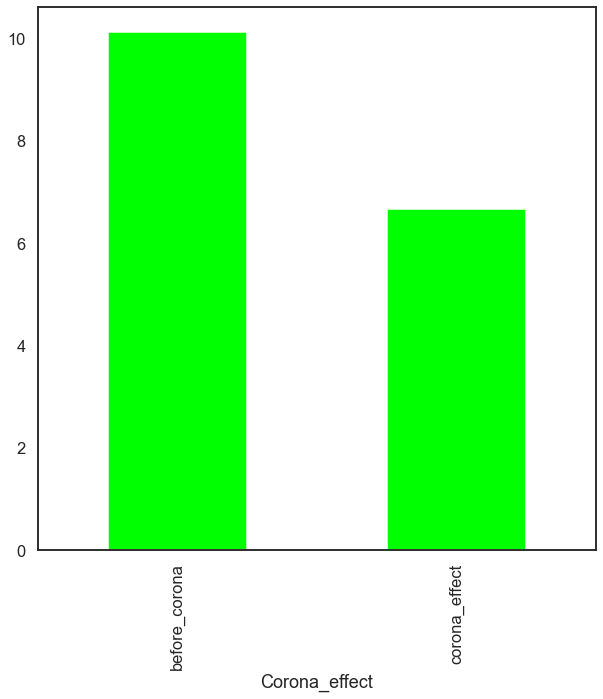

In [29]:
df.groupby('Corona_effect')['number_of_items_bought'].mean().plot(kind='bar',figsize=(10,10),cmap='brg_r')

#### Also, more number of items were bought before corona than after corona, with 10 items being bought on average, and about 6 items being bought after corona,

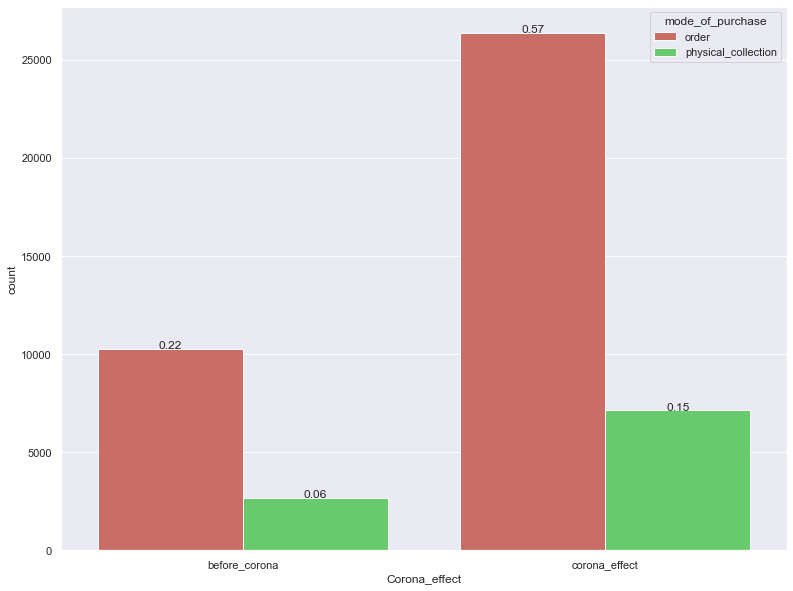

In [30]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(13,10))
ax = sns.countplot(x="Corona_effect", hue="mode_of_purchase", data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/df.shape[0]),
            ha="center")

#### As expected, 57% of all purchases were done online(delivery) after corona, with only 22% being done before corona, as the social distancing protocol was implemented in all areas, people just order their equipment, and its delivered to them

In [31]:
df

,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought,month,day,seasons,weekday,Corona_effect
0,2019-08-01,order,fitness,east,167.176800,7,8,1,Summer,weekday,before_corona
1,2019-08-01,order,jog/run,south,297.508400,8,8,1,Summer,weekday,before_corona
2,2019-08-01,order,pilates,south,150.516800,5,8,1,Summer,weekday,before_corona
3,2019-08-01,order,pilates,east,91.911400,7,8,1,Summer,weekday,before_corona
4,2019-08-01,physical_collection,diving,west,90.819400,2,8,1,Summer,weekday,before_corona
...,...,...,...,...,...,...,...,...,...,...,...
46758,2021-10-31,order,swimming,south,87.588667,4,10,31,Autumn,weekend,corona_effect
46759,2021-10-31,order,basketball,south,19.809333,1,10,31,Autumn,weekend,corona_effect
46760,2021-10-31,order,triathlon,east,46.942667,1,10,31,Autumn,weekend,corona_effect
46761,2021-10-31,order,tennis,south,154.963333,5,10,31,Autumn,weekend,corona_effect


In [32]:
#remove unneccesary features
df=df.drop(columns=['Date','Corona_effect'])

In [33]:
df.head()

,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought,month,day,seasons,weekday
0,order,fitness,east,167.1768,7,8,1,Summer,weekday
1,order,jog/run,south,297.5084,8,8,1,Summer,weekday
2,order,pilates,south,150.5168,5,8,1,Summer,weekday
3,order,pilates,east,91.9114,7,8,1,Summer,weekday
4,physical_collection,diving,west,90.8194,2,8,1,Summer,weekday


In [34]:
len(df)

46478

In [35]:
df.corr()

,estimated_spending,number_of_items_bought,month,day
estimated_spending,1.000000,0.932178,0.035314,-0.012047
number_of_items_bought,0.932178,1.000000,0.027716,-0.017727
month,0.035314,0.027716,1.000000,0.011353
day,-0.012047,-0.017727,0.011353,1.000000


In [36]:
df['month']=df['month'].astype('category')

<AxesSubplot:ylabel='estimated_spending'>

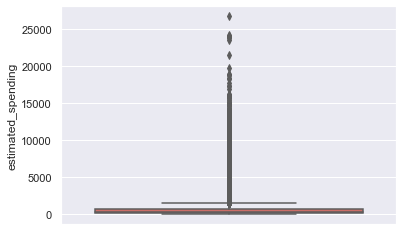

In [37]:
sns.boxplot(y=df['estimated_spending'])

In [38]:
df['estimated_spending'].describe()

count    46478.000000
mean       606.349969
std       1250.052653
min          6.667333
25%         72.980700
50%        275.603000
75%        616.451750
max      26702.307800
Name: estimated_spending, dtype: float64